<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [139]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [140]:
# Read CSV
house = pd.read_csv("C:/Users/carls/Desktop/IOD/Data/Sacramento_transactions.csv")

In [141]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [142]:
house.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [143]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [144]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [145]:
house['zip'] = house['zip'].astype(str)

In [146]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [147]:
#Checking the properties with 0 beds

In [148]:
house[house['beds']==0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


<AxesSubplot:>

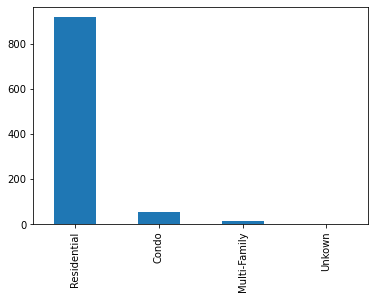

In [149]:
house['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

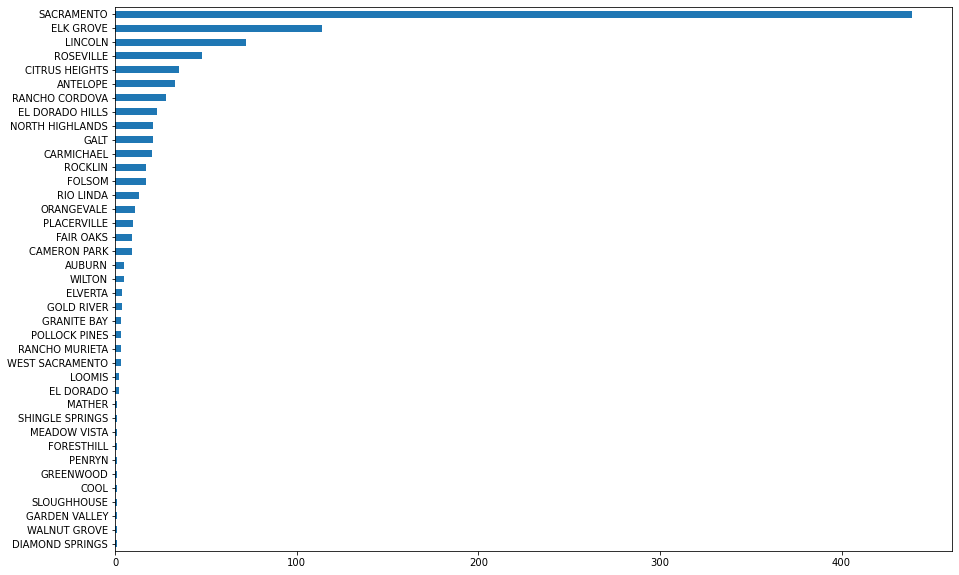

In [150]:
house['city'].value_counts().sort_values().plot(kind='barh', figsize = (15,10))

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [151]:
#We will use price as the target variable because we want to know which other factors from the data impact sales prices.
targetvariable = house.price

#### 2.2 List all possible variables which might be Predictor variable.

In [152]:
# ANSWER
# beds 
# bath
#sq__ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [153]:
house.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


### Best predictor
sq__ft is the best predictor as it has a strong relationship with both number of beds and baths.

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [154]:
# The prediction method yhat will assign each row in future a predicted value which it names yhat
house['y_hat']=house['price'].mean()
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,234144.263959
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,234144.263959
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,234144.263959
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,234144.263959


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [155]:
residual = abs(house.price - house.y_hat).mean()
residual

103452.16956891441

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [156]:
X = house.sq__ft
Y = house.price

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [157]:
def beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    return np.sum ((Y - Ybar) * (X - Xbar)) / np.sum (np.square(X - Xbar))
    
beta_1 = beta_1(X, Y)
beta_1

54.158639688530755

In [158]:
#beta_1 = lr.coef_

In [159]:
# Answer
#def calculate_beta_1(X, Y):
#    Xbar = X.mean()
#    Ybar = Y.mean()
#    
#    n = np.sum((Y - Ybar) * (X - Xbar)) 
#    d = np.sum(np.square(X - Xbar)) 
#    
#    beta_1 = n/d
#    
#    return beta_1

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [160]:
X = house.sq__ft
Y = house.price
Xbar = X.mean()
Ybar = Y.mean()

In [161]:
def beta_0 (beta_1, Xbar, Ybar):
    
    return Ybar - beta_1 * Xbar

beta_0 = beta_0(beta_1, Xbar, Ybar)
beta_0

162930.16140699777

In [162]:
#beta_0 = lr.intercept_

In [163]:
# Answer
#def calculate_beta_0(X, Y):
#    
#    Xbar = X.mean()
#    Ybar = Y.mean()
#    
#    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
#    
#    return beta_0

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [164]:
y_hat = (beta_0 + beta_1 * X)
print(y_hat)

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64


##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [165]:
residual = Y - y_hat
print(residual)

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [166]:
X = house.sq__ft
Y = house.price
Xbar = X.mean()
Ybar = Y.mean()

In [167]:
# The total sum of squares (own attempt):
# def calc_SS_total (Y, Ybar):
#    SS_total = np.sum(Y - Ybar)
#    return SS_total

In [168]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [169]:
# The residual sum of squares (own attempt):
# def calc_SS_res (Y, y_hat):
#    SS_res = np.sum(np.square (Y - y_hat))
#    return SS_res

In [170]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [171]:
# 𝑅2 (own attempt)
#def calc_R2 (N, SS_total, SS_res):
#    R2 = 1 - SS_res / SS_total
#    return calc_R2

In [172]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [173]:
y_hat = (beta_0 + beta_1 * X)

In [174]:
calculate_r_square(Y, np.mean(Y))

0.0

In [178]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

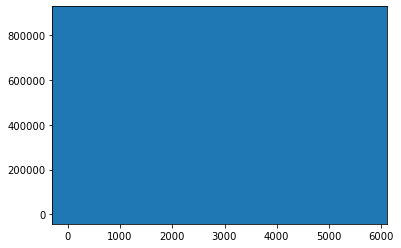

In [179]:
plt.scatter(X, Y, y_hat)


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [183]:
house['Yhat'] = y_hat

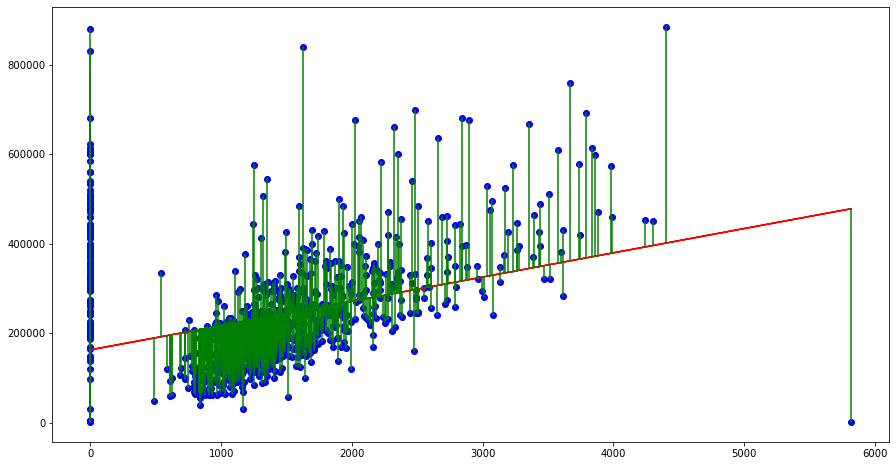

In [186]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, y_hat, color='r');

# iterate over predictions
for _, row in house.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [187]:
beta_0

162930.16140699777

In [188]:
beta_1

54.158639688530755

In [189]:
sq__ft = 1204

In [191]:
Prediction = sq__ft*beta_1 + beta_0
Prediction

228137.1635919888



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



